<h1 align="center">Zindi Africa Problem Using Machine  Learning</h1>

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


This post is the opportunity to share my solution with you.

To make this tutorial more "academic" so that anyone could benefit, I will first start with an exploratory data analysis (EDA) then I'll follow with feature engineering and finally present the predictive model I set up.

Throughout this jupyter notebook, I will be using Python at each level of the pipeline.

The main libraries involved in this tutorial are: 

* <b>Pandas</b> for data manipulation and ingestion
* <b>Matplotlib</b> and <b> seaborn</b> for data visualization
* <b>Numpy</b> for multidimensional array computing
* <b>sklearn</b> for machine learning and predictive modeling

### Installation procedure 

A very easy way to install these packages is to download and install the <a href="http://conda.pydata.org/docs/install/quick.html#os-x-miniconda-install">Conda</a> distribution that encapsulates them all. This distribution is available on all platforms (Windows, Linux and Mac OSX).

### Nota Bene

This is my first attempt as a blogger and as a machine learning practitioner. 

If you have a question about the code or the hypotheses I made, do not hesitate to post a comment in the comment section below.

If you also have a suggestion on how this notebook could be improved, please reach out to me.

This tutorial is available on my <a href="https://github.com/ahmedbesbes/How-to-score-0.8134-in-Titanic-Kaggle-Challenge"> github </a> account.

# I -  Exploratory data analysis

As in different data projects, we'll first start diving into the data and build up our first intuitions.

In this section, we'll be doing four things. 

- Data extraction : we'll load the dataset and have a first look at it. 
- Cleaning : we'll fill in missing values.
- Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
- Assumptions : we'll formulate hypotheses from the charts.

We tweak the style of this notebook a little bit to have centered plots.

In [470]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

We import the useful libraries.

In [471]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

Two datasets are available: a training set and a test set.
We'll be using the training set to build our predictive model and the testing set to score it and generate an output file to submit on the Zindi evaluation system.

We'll see how this procedure is done at the end of this post.

Now let's start by loading the training set.

In [472]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [473]:
print (data.shape)

(23524, 13)


We have:

- 23524 rows
- 13 columns

Pandas allows you to have a sneak peak at your data.

In [474]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


The bank_account column is the ** target variable**. This is the variable we're going to predict.

The other variables describe the individuals. They are the **features**.

We can iterate through the features and their Descriptions thanks to Variable Definitions csv file .

First , we need to import it from the repository .


In [475]:
variables =  pd.read_csv('./VariableDefinitions.csv')

Now that we loaded the data , it's time to have a look at it 

In [476]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...



Pandas allows you to a have a high-level simple statistical description of the numerical features.
This can be done using the describe method.

In [477]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


We have 3 numerical columns since the rest are categorical .

At first look , we can see that there is no missiong data in the train set or at least in the three columns giving above , we need to make it certain , therefore we will count the null values :

In [478]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

No null values in the training set , it's pretty common to have a clean data to work with from the beginning in such beginner level Problem .

In [482]:
data.loc[data["bank_account"] == "Yes", "bank_account"] = 1 
data.loc[data["bank_account"] == "No", "bank_account"] = 0 

In [483]:
data.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
7858,Rwanda,2016,uniqueid_1791,0,Rural,Yes,4,28,Male,Head of Household,Married/Living together,Primary education,Informally employed
10885,Rwanda,2016,uniqueid_4818,1,Rural,Yes,5,34,Male,Head of Household,Married/Living together,Secondary education,Self employed
22873,Uganda,2018,uniqueid_1451,0,Rural,Yes,7,51,Male,Head of Household,Married/Living together,Secondary education,Formally employed Private
12367,Rwanda,2016,uniqueid_6300,0,Rural,Yes,4,25,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
17822,Tanzania,2017,uniqueid_3020,0,Rural,Yes,5,21,Female,Parent,Divorced/Seperated,Primary education,Self employed


Before heading to visulazation , let's see how unbalanced is our training set

In [484]:
a = len(data[data.bank_account== 1])
c = len(data)

print('our training set consist of %f per cent positive labels . '%((a/c)*100))

our training set consist of 14.079238 per cent positive labels . 


Perfect.

Let's now make some charts.



# II-  Data Visualization

In [485]:
data['no bank_account'] = 1 - data['bank_account']

Let's plot the bank account features based on cellphone access 

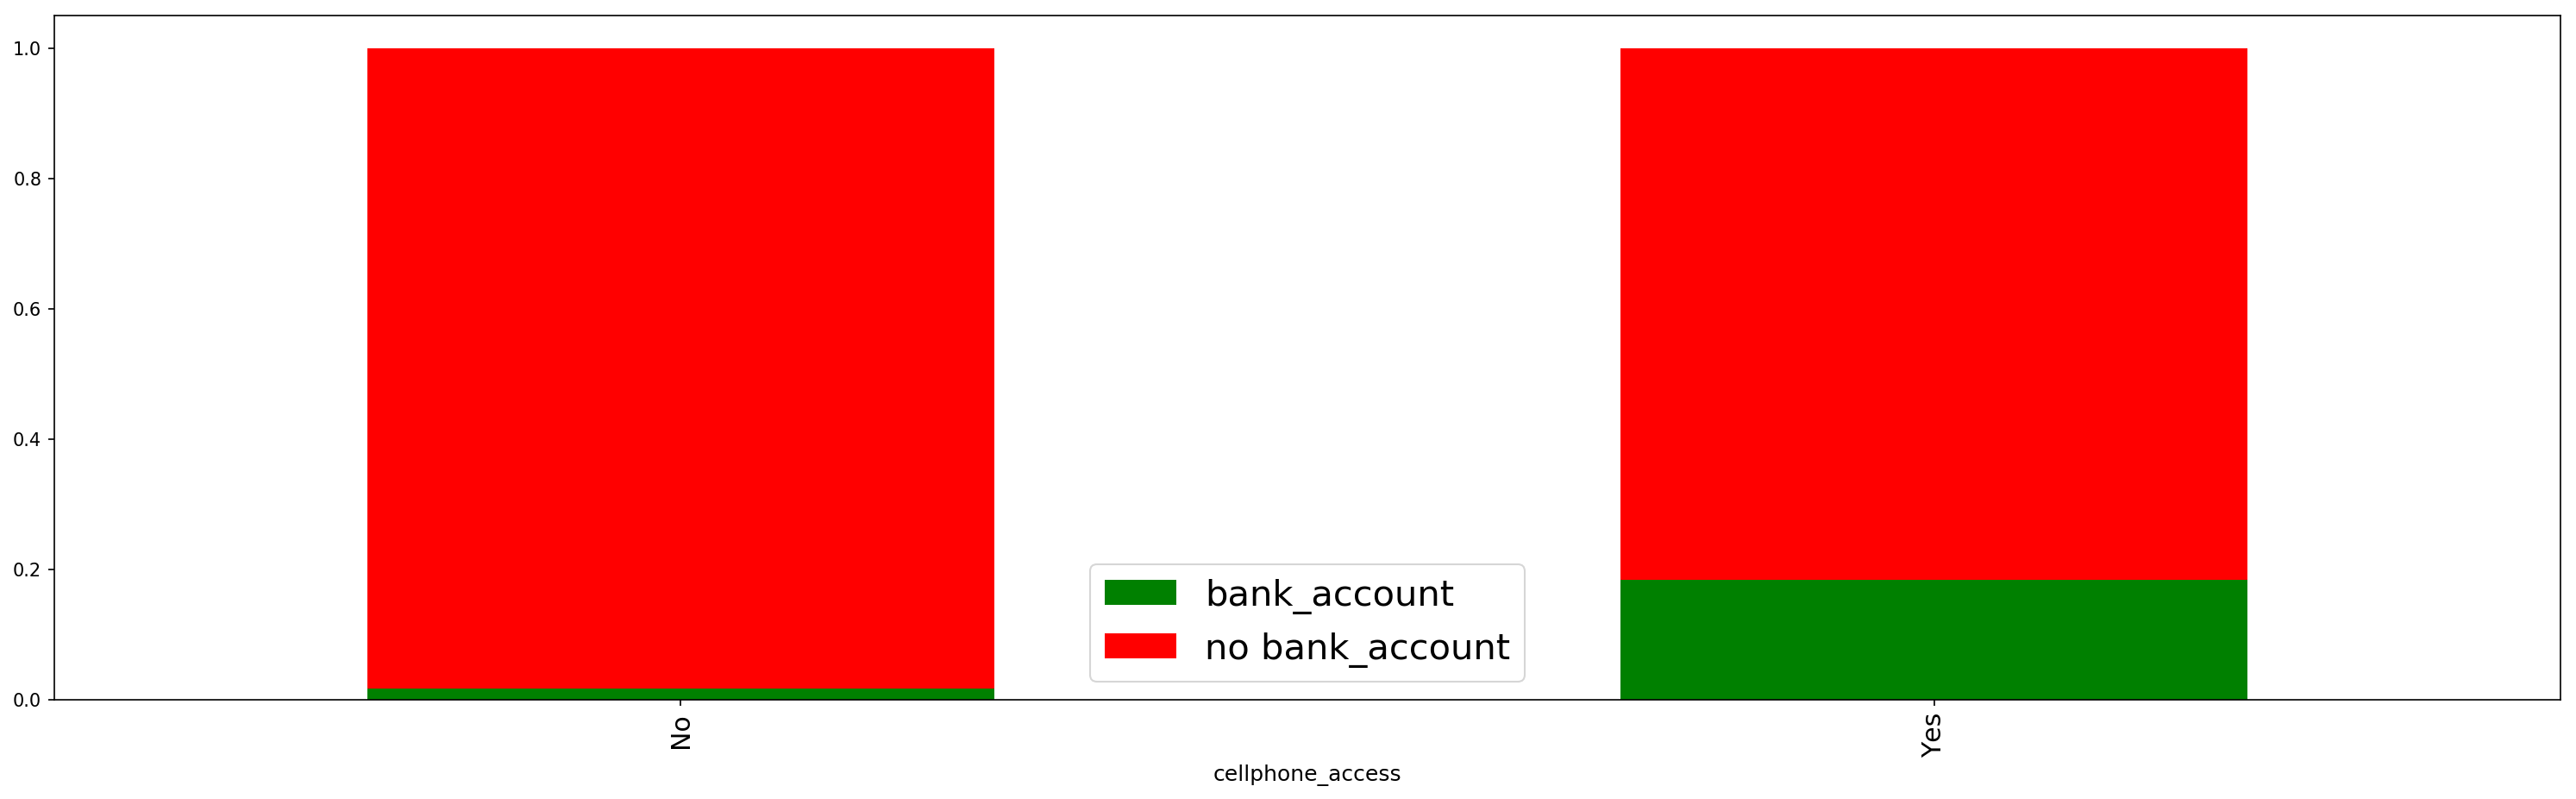

In [486]:
data.groupby('cellphone_access').agg('mean')[['bank_account', 'no bank_account']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True , colors=['g', 'r']);


* we can notice that the <b>cellphone access</b> individual is more likely to have a bank account .

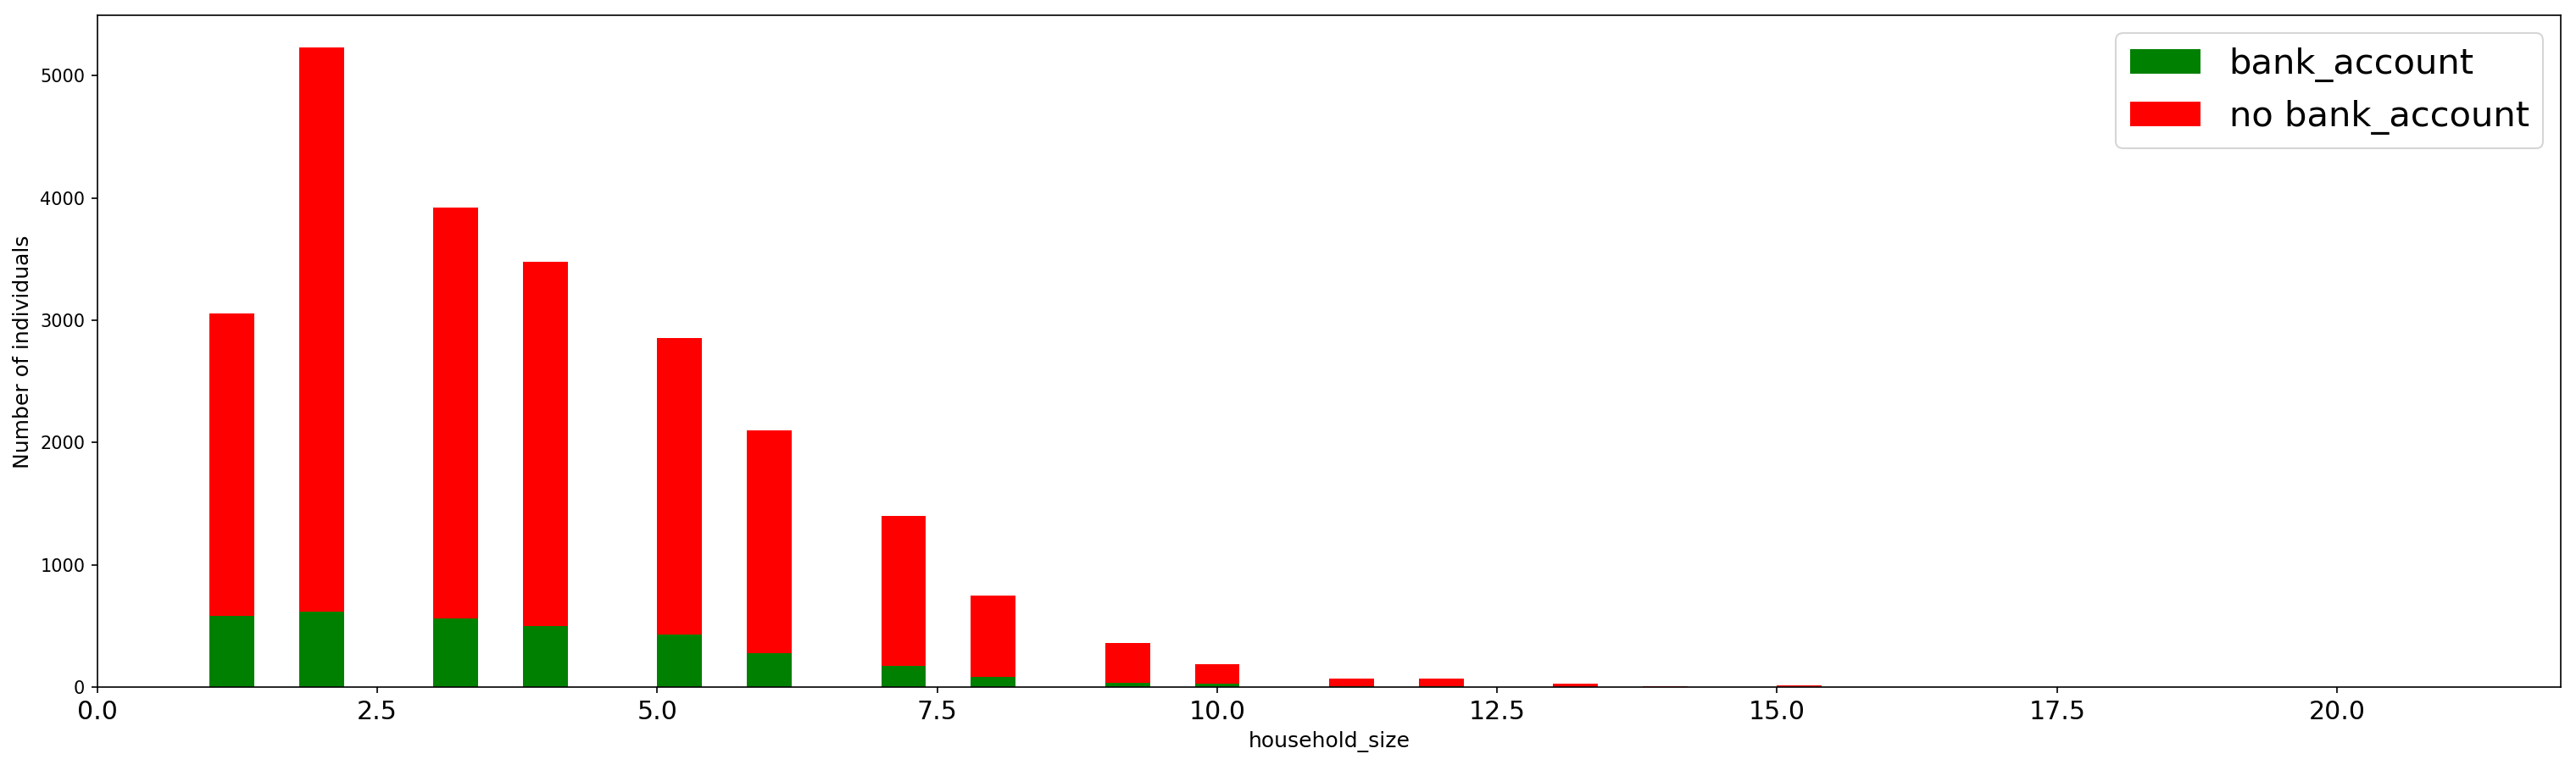

In [487]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['bank_account'] == 1]['household_size'], data[data['bank_account'] == 0]['household_size']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['bank_account','no bank_account'])
plt.xlabel('household_size')
plt.ylabel('Number of individuals')
plt.legend();

* we can notice that the <b>smaller household size</b> resident individual is more likely to have a bank account .


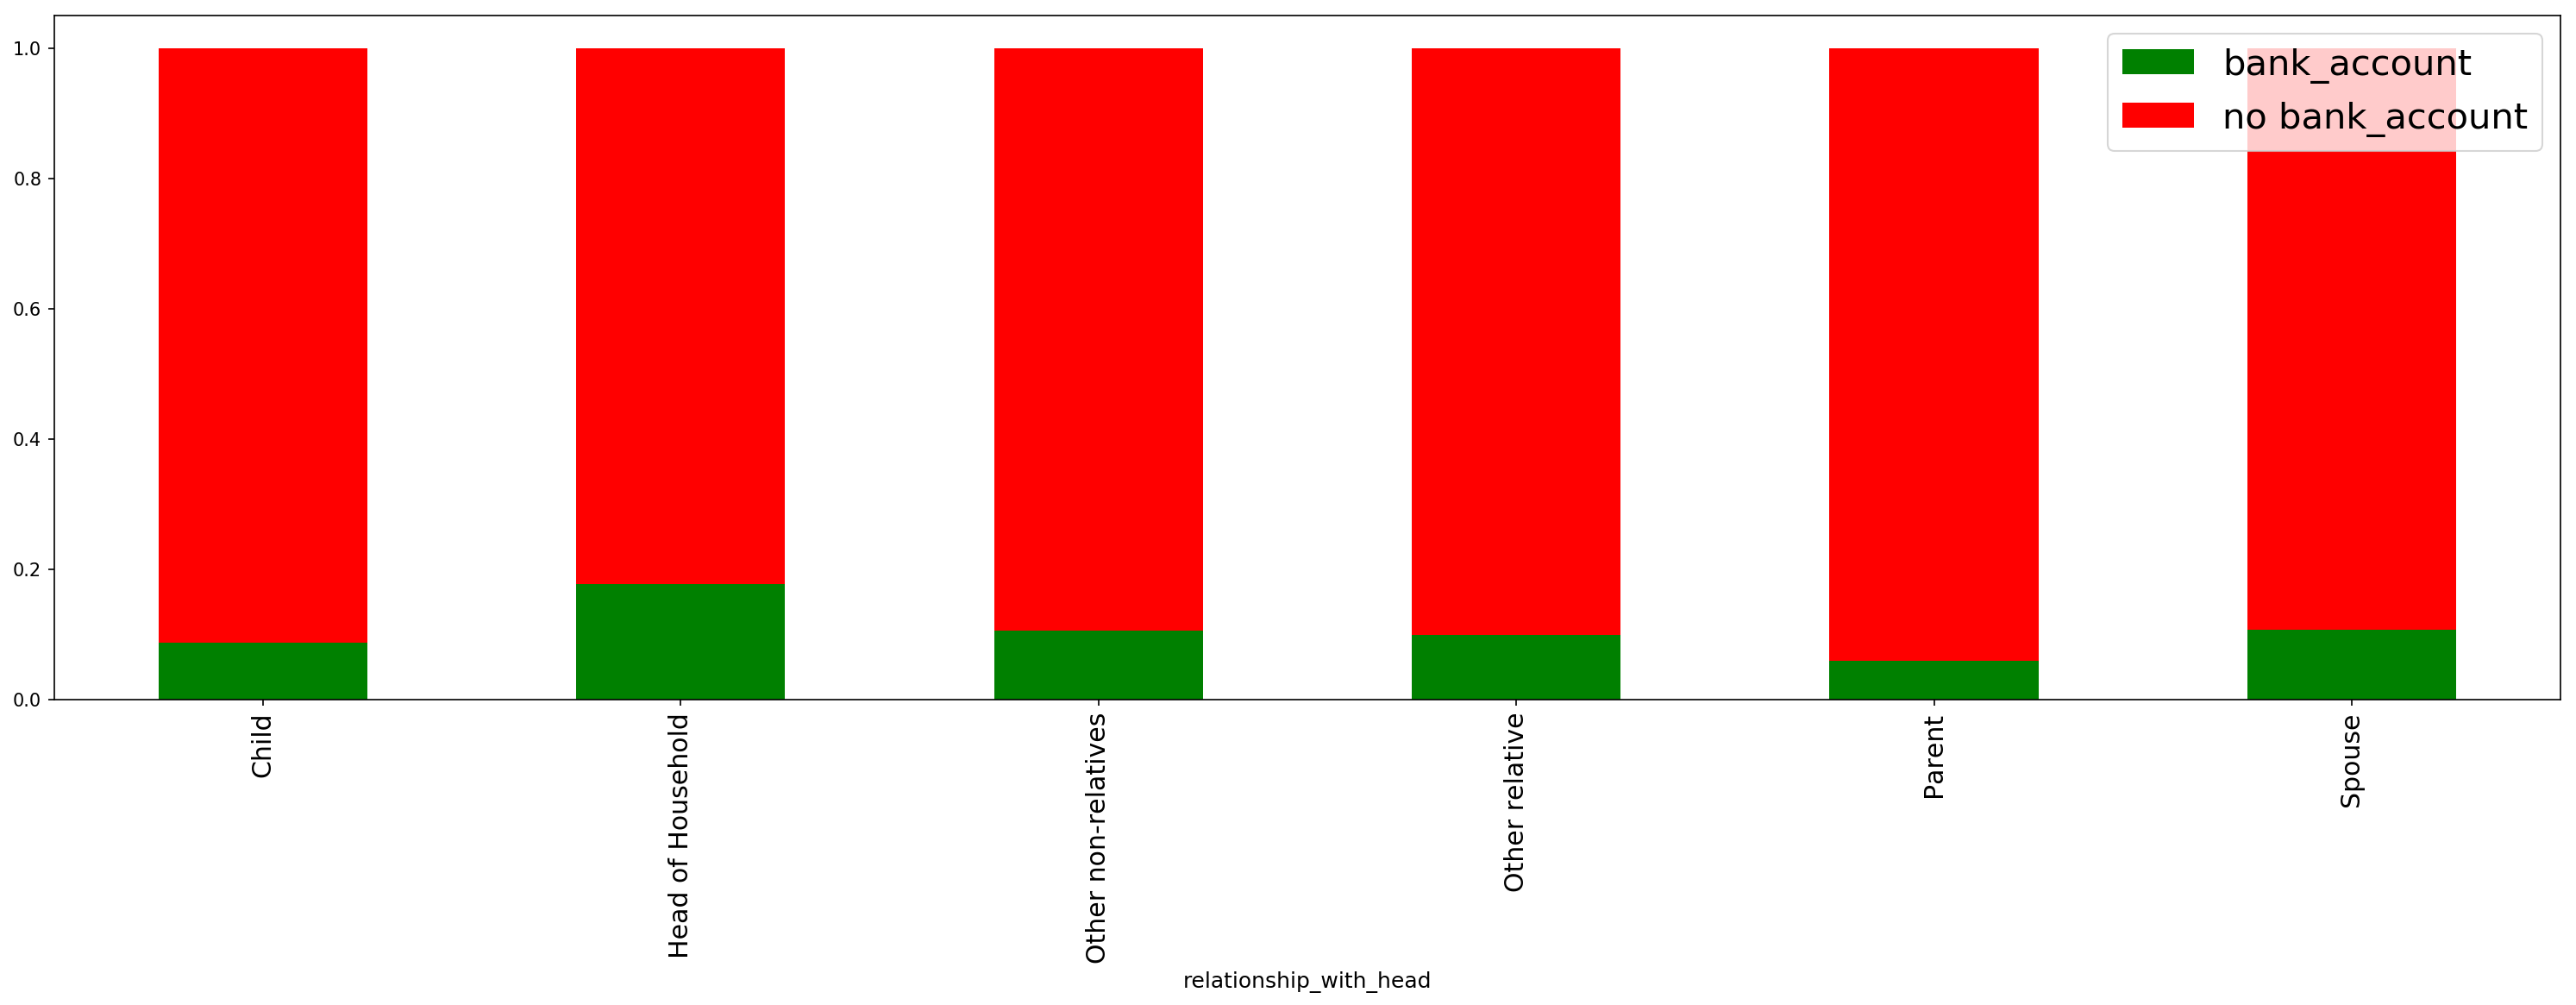

In [488]:
data.groupby('relationship_with_head').agg('mean')[['bank_account', 'no bank_account']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True , colors=['g', 'r']);

* we can notice that the <b>Head of Household</b> individual is more likely to have a bank account .


# II - Feature engineering




In the previous part, we flirted with the data and spotted some interesting correlations.

In this part, we'll see how to process and transform these variables in such a way the data becomes manageable by a machine learning algorithm.

We'll also create, or "engineer" additional features that will be useful in building the model.

We'll see along the way how to process text variables like the passenger names and integrate this information in our model.

We will break our code in separate functions for more clarity.

But first, let's define a print function that asserts whether or not a feature has been processed.


In [489]:
def status(feature):
    print ('Processing', feature, ': ok')

### Loading the data

One trick when starting a machine learning problem is to append the training set to the test set together.

We'll engineer new features using the train set to prevent information leakage. Then we'll add these variables to the test set.

Let's load the train and test sets and append them together.

In [490]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('./train.csv')
    
    # reading test data
    test = pd.read_csv('./test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.bank_account
    train.drop(['bank_account'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'uniqueid'], inplace=True, axis=1)
    
    return combined

In [491]:
combined = get_combined_data()



Let's have a look at the shape :


In [492]:
print (combined.shape)

(33610, 11)




train and test sets are combined.

You may notice that the total number of rows (33610) is the exact summation of the number of rows in the train set and the test set.


In [493]:
combined.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


### Proccessing education level

In [494]:
def process_education_level():
    global combined
    # dummy encoding 
    education_level_dummies = pd.get_dummies(combined['education_level'], prefix='education_level')
    combined = pd.concat([combined, education_level_dummies], axis=1)
    combined.drop('education_level', axis=1, inplace=True)
    status('education_level')
    return combined



This functions replaces the two missing values of Embarked with the most frequent Embarked value.


In [495]:
combined = process_education_level()

Processing education_level : ok


In [496]:
combined.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,job_type,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Self employed,0,0,0,1,0,0
1,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,Government Dependent,1,0,0,0,0,0
2,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Self employed,0,0,0,0,0,1
3,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Formally employed Private,0,0,1,0,0,0
4,Kenya,2018,Urban,No,8,26,Male,Child,Single/Never Married,Informally employed,0,0,1,0,0,0


### Proccessing Job type

In [497]:
def process_job_type():
    global combined
    # dummy encoding job_type
    job_type_dummies = pd.get_dummies(combined['job_type'], prefix='job_type')
    combined = pd.concat([combined, job_type_dummies], axis=1)
    combined.drop('job_type', axis=1, inplace=True)
    status('job_type')
    return combined

In [498]:
combined = process_job_type()

Processing job_type : ok


In [499]:
combined.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,Married/Living together,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,Urban,No,8,26,Male,Child,Single/Never Married,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### Proccessing Marital Status

In [500]:
def process_marital_status() :
    global combined
    # dummy encoding job_type
    marital_status_dummies = pd.get_dummies(combined['marital_status'], prefix='marital_status')
    combined = pd.concat([combined, marital_status_dummies], axis=1)
    combined.drop('marital_status', axis=1, inplace=True)
    status('marital_status')
    return combined

In [501]:
combined = process_marital_status()

Processing marital_status : ok


In [502]:
combined.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed
0,Kenya,2018,Rural,Yes,3,24,Female,Spouse,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Kenya,2018,Rural,No,5,70,Female,Head of Household,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,Kenya,2018,Urban,Yes,5,26,Male,Other relative,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,Kenya,2018,Urban,No,8,26,Male,Child,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### Proccessing Relationship with head

In [503]:
def process_relationship_with_head():
    global combined
    # dummy encoding job_type
    relationship_with_head_dummies = pd.get_dummies(combined['relationship_with_head'], prefix='relationship_with_head')
    combined = pd.concat([combined, relationship_with_head_dummies], axis=1)
    combined.drop('relationship_with_head', axis=1, inplace=True)
    status('relationship_with_head')
    return combined

In [504]:
combined = process_relationship_with_head()

Processing relationship_with_head : ok


In [505]:
combined.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,Kenya,2018,Rural,Yes,3,24,Female,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,Kenya,2018,Rural,No,5,70,Female,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,Kenya,2018,Urban,Yes,5,26,Male,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,Kenya,2018,Rural,Yes,5,34,Female,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Kenya,2018,Urban,No,8,26,Male,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


### Proccessing Cellphone access

In [506]:
def process_cellphone_access():
    global combined
    combined.loc[combined["cellphone_access"] == "Yes", "cellphone_access"] = 1 
    combined.loc[combined["cellphone_access"] == "No", "cellphone_access"] = 0 
    status('cellphone_access')
    return combined

In [507]:
combined = process_cellphone_access()

Processing cellphone_access : ok


In [508]:
combined.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,Kenya,2018,Rural,1,3,24,Female,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,Kenya,2018,Rural,0,5,70,Female,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,Kenya,2018,Urban,1,5,26,Male,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,Kenya,2018,Rural,1,5,34,Female,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Kenya,2018,Urban,0,8,26,Male,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


### Proccessing gender of respondent

In [509]:
def process_gender_of_respondent():
    global combined
    combined.loc[combined["gender_of_respondent"] == "Male", "gender_of_respondent"] = 0 
    combined.loc[combined["gender_of_respondent"] == "Female", "gender_of_respondent"] = 1 
    status('gender_of_respondent')
    return combined

In [510]:
combined = process_gender_of_respondent()

Processing gender_of_respondent : ok


In [511]:
combined.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,Kenya,2018,Rural,1,3,24,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,Kenya,2018,Rural,0,5,70,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,Kenya,2018,Urban,1,5,26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,Kenya,2018,Rural,1,5,34,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Kenya,2018,Urban,0,8,26,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


### Proccessing location type

In [512]:
def process_location_type():
    global combined
    combined.loc[combined["location_type"] == "Rural", "location_type"] = 0 
    combined.loc[combined["location_type"] == "Urban", "location_type"] = 1 
    status('location_type')
    return combined

In [513]:
combined = process_location_type()

Processing location_type : ok


In [514]:
combined.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,Kenya,2018,0,1,3,24,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,Kenya,2018,0,0,5,70,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,Kenya,2018,1,1,5,26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,Kenya,2018,0,1,5,34,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Kenya,2018,1,0,8,26,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


### Proccessing country

In [515]:
def process_country():
    global combined
    # dummy encoding job_type
    country_dummies = pd.get_dummies(combined['country'], prefix='country')
    combined = pd.concat([combined, country_dummies], axis=1)
    combined.drop('country', axis=1, inplace=True)
    status('country')
    return combined

In [516]:
combined = process_country()

Processing country : ok


In [517]:
combined.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,0,1,3,24,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
1,2018,0,0,5,70,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,2018,1,1,5,26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,2018,0,1,5,34,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,2018,1,0,8,26,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0


# III - Modeling


In this part, we use our knowledge of the passengers based on the features we created and then build a statistical model. You can think of this model as a box that crunches the information of any new passenger and decides whether or not he survives.

There is a wide variety of models to use, from logistic regression to decision trees and more sophisticated ones such as random forests and gradient boosted trees.

We'll be using Random Forests. Random Froests has proven a great efficiency in  competitions.

Back to our problem, we now have to:

    Break the combined dataset in train set and test set.
    Use the train set to build a predictive model.
    Evaluate the model using the train set.
    Test the model using the test set and generate and output file for the submission.

Keep in mind that we'll have to reiterate on 2. and 3. until an acceptable evaluation score is achieved.



Let's start by importing the useful libraries.


In [518]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV



To evaluate our model we'll be using a 5-fold cross validation with the accuracy since it's the metric that the competition uses in the leaderboard.

To do that, we'll define a small scoring function.


In [519]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)



Recovering the train set and the test set from the combined dataset is an easy task.


In [520]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('./train.csv', usecols=['bank_account'])['bank_account'].values
    train = combined.iloc[:23524]
    test = combined.iloc[23524:]
    
    return train, test, targets

In [521]:
train, test, targets = recover_train_test_target()

## Feature selection 

We've come up to more than 40 features so far. This number is quite large.

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.

In fact, feature selection comes with many benefits:

    It decreases redundancy among the data
    It speeds up the training process
    It reduces overfitting

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.


In [522]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)



Let's have a look at the importance of each feature.


In [523]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

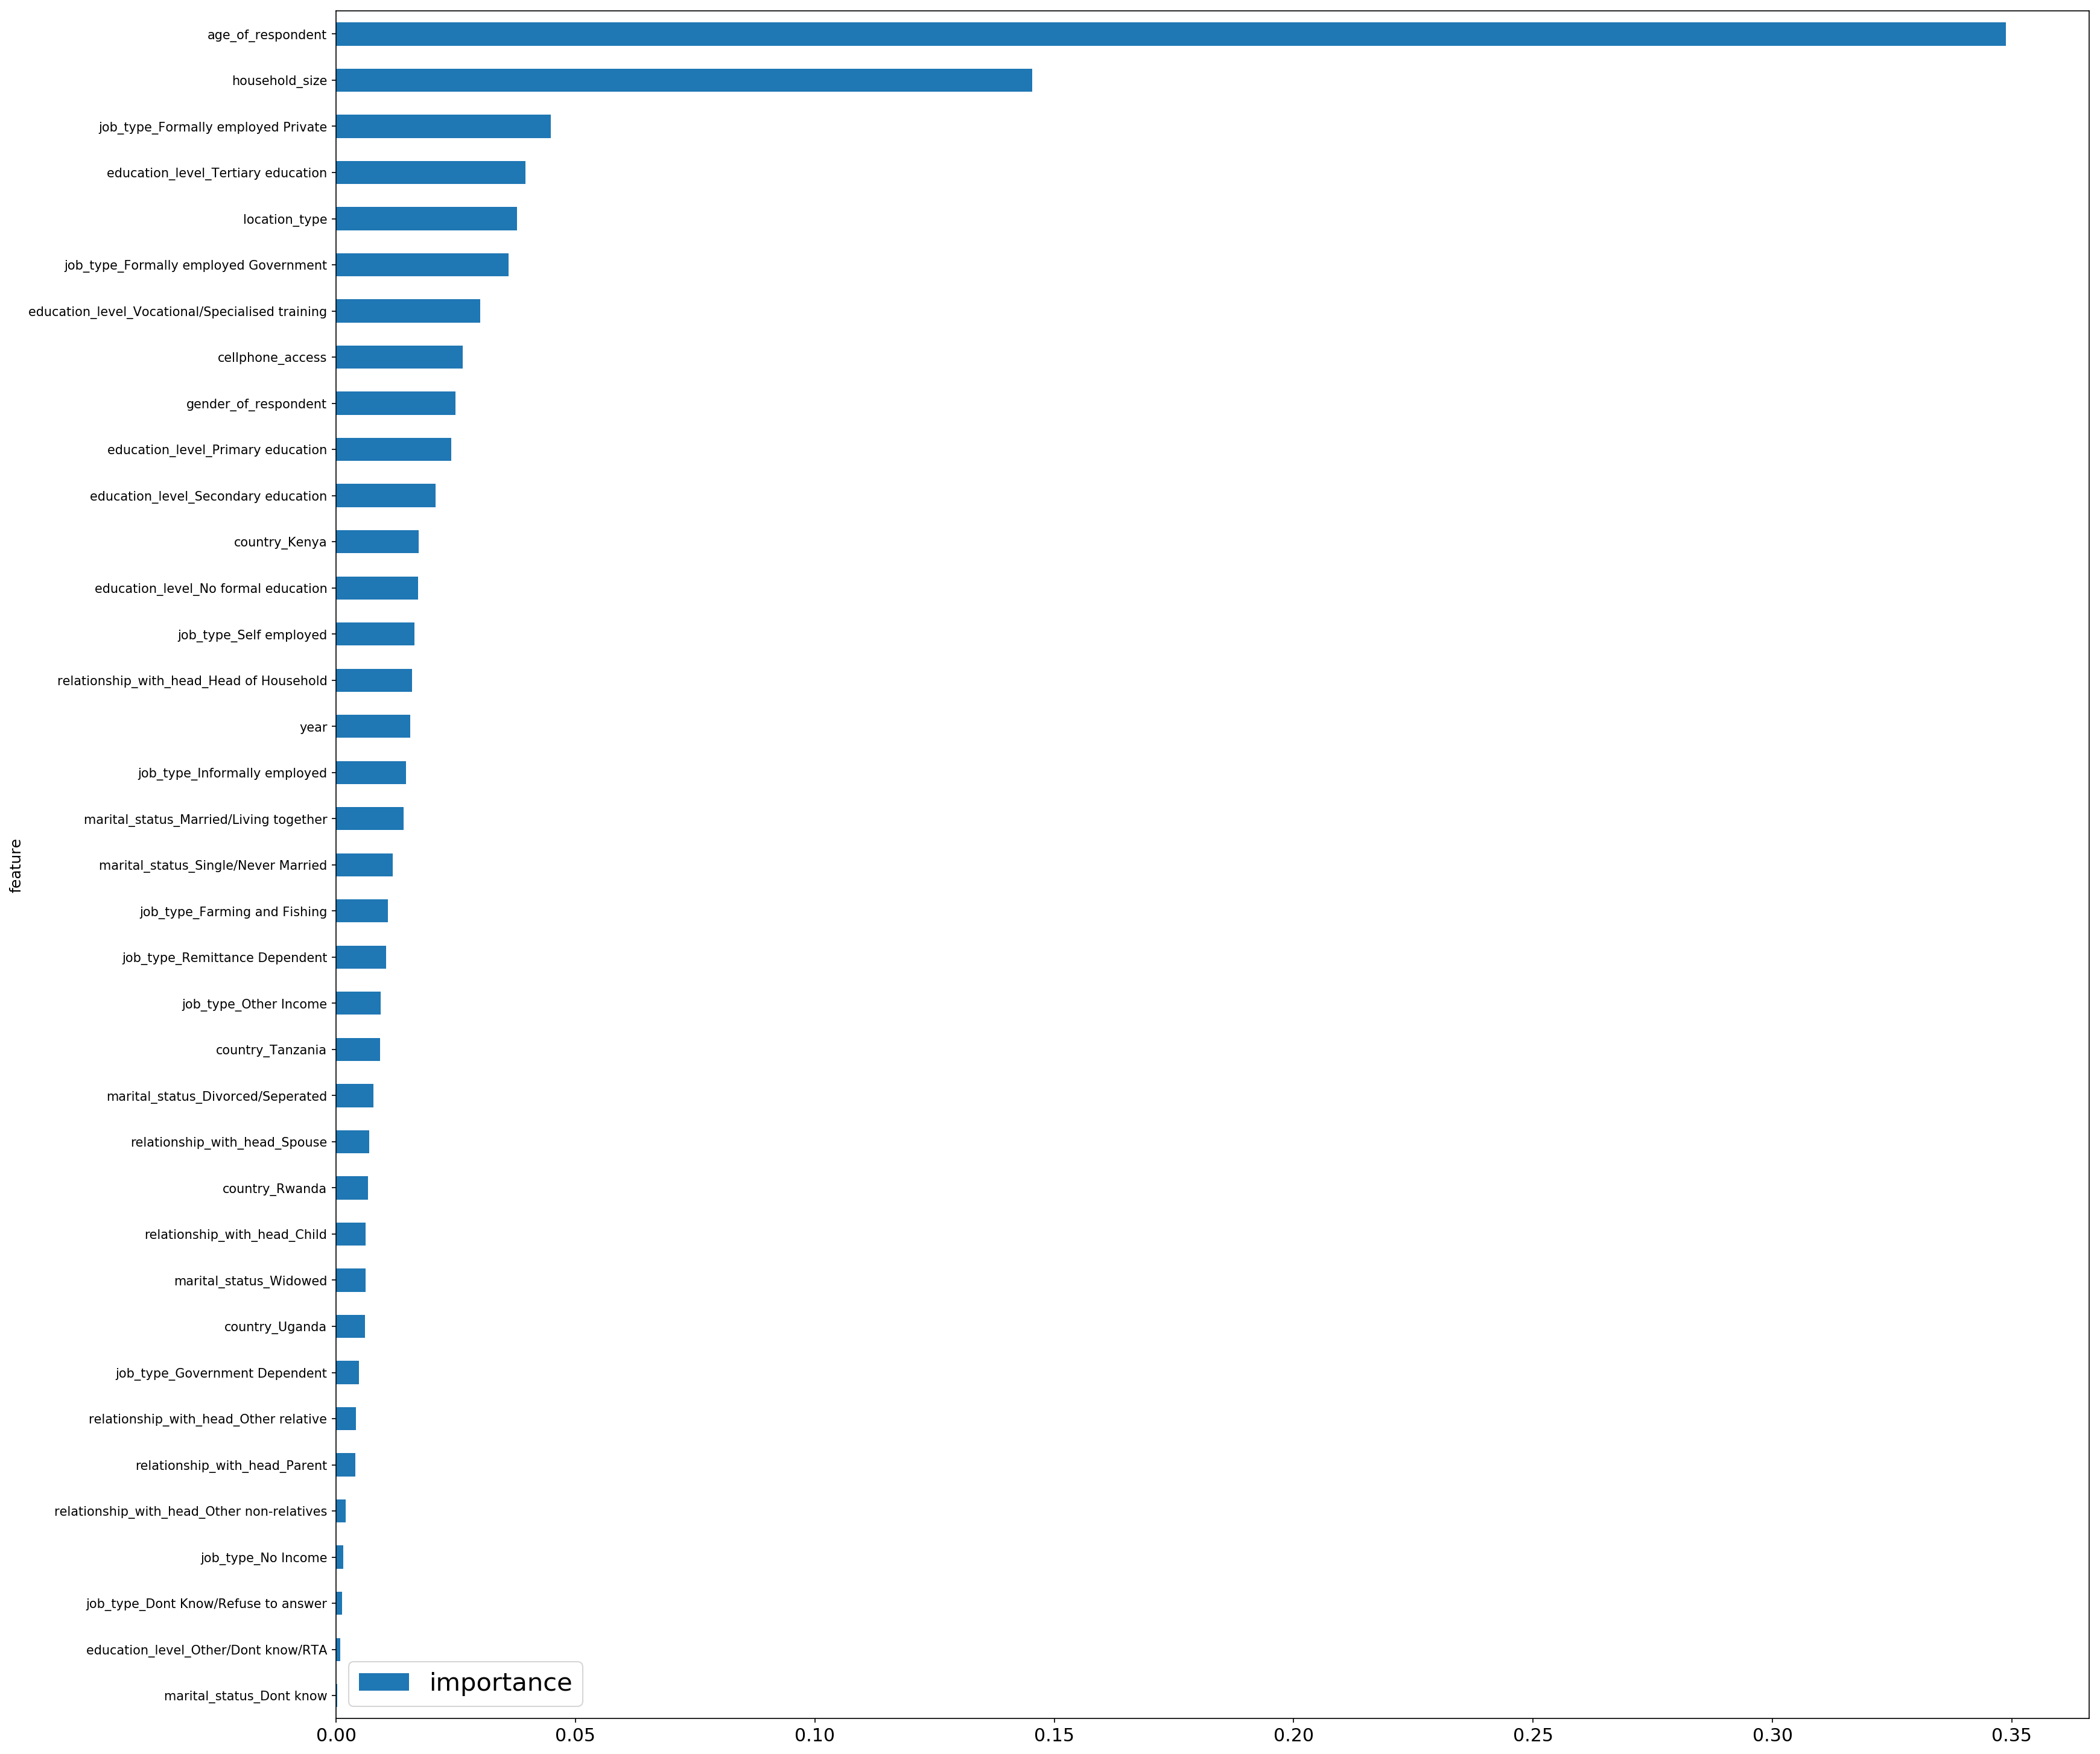

In [524]:
features.plot(kind='barh', figsize=(25, 25))



As you may notice, there is a great importance linked to Household size, Age and Job type.

Let's now transform our train set and test set in a more compact datasets.


In [525]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print (train_reduced.shape)

(23524, 7)


In [526]:
test_reduced = model.transform(test)
print (test_reduced.shape)

(10086, 7)




Yay! Now we're down to a lot less features.

We'll see if we'll use the reduced or the full version of the train set.



### Let's try different base models


In [527]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [528]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8724703916840856
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8722578066500718
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8642239354305259
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8728108891240304
****



### Hyperparameters tuning




As mentioned in the beginning of the Modeling part, we will be using a Random Forest model. It may not be the best model for this task but we'll show how to tune. This work can be applied to different models.

Random Forest are quite handy. They do however come with some parameters to tweak in order to get an optimal model for the prediction task.

To learn more about Random Forests, you can refer to this link :

Additionally, we'll use the full train set.


In [529]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)



Now that the model is built by scanning several combinations of the hyperparameters, we can generate an output file to submit on Zindi.


In [ ]:
output = model.predict(test).astype(str)
df_output = pd.DataFrame()
aux = pd.read_csv('./test.csv')
df_output['uniqueid'] = aux['uniqueid'] + " x " + aux['country']
df_output['bank_account'] = output

df_output.loc[df_output["bank_account"] == "No", "bank_account"] = 0.0 
df_output.loc[df_output["bank_account"] == "Yes", "bank_account"] = 1.0 

df_output['bank_account'] = df_output['bank_account'].astype(float)

df_output[['uniqueid','bank_account']].to_csv('./Submissionfile.csv', index=False)

### Blending different models

In [593]:
trained_models = []
for model in models:
    model.fit(train, targets)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['uniqueid'] = aux['uniqueid'] + " x " + aux['country']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['uniqueid', 'out']]
predictions_df.columns = ['uniqueid', 'bank_account']

In [594]:
predictions_df.to_csv('./blending_base_models.csv', index=False)

In [595]:
predictions_df.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
